In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, solve_bvp
from matplotlib import rcParams
#rcParams['text.usetex']=True
#rcParams['font.family']='serif' #'sans-serif' 

In [2]:
# Constantes Universales
G = 6.6743015e-20 #km³/kg*s²
c = 299792.458 #km/s
Msol = 1.98847e30 #kg
Masas_solares = G*Msol/c**2 #en unidades geométricas (km)

# Datos iniciales de la estrella
M = 2.06 * Masas_solares
R = 7.61 #km
Umax = M/R

P = 20 #segundos
#asp = 4.*np.pi/5.*R**2/(P*c)
asp = 0.5

"""
Valores que sí son útiles:

l=2, q=100 con P = 20 s y R=2.5M
"""
l = 2
q = 100
print('a=', asp, 'km')

a= 0.5 km


In [3]:
# Parámetro de compacidad
print('R= ',R/M,' M')
if R/M>3:
    print('Estrella OK')
else:
    print('La estrella es ultracompacta')

R=  2.50169279526398  M
La estrella es ultracompacta


7.610761076107611 71.73134258651434 ° 80.36704752306889 °


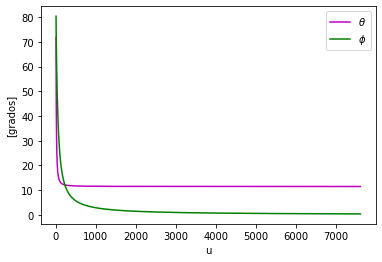

In [4]:
#%matplotlib notebook
def RK4_thetau(f,a,b,N):
    theta = 0.2
    h = (b-a)/float(N)
    lista_u=np.arange(a,b,h)
    lista_theta=np.zeros(N)
    lista_theta[0]=theta
    for i in range(N-1): 
        u = lista_u[i]
        k1=h*f(theta,u)
        k2=h*f(theta+0.5*k1,u+0.5*h)
        k3=h*f(theta+0.5*k2,u+0.5*h)
        k4=h*f(theta+k3,u+h)
        theta+=(k1+2*k2+2*k3+k4)/6.
        lista_theta[i+1]=np.copy(theta)
    return lista_u,lista_theta

def RK4_phiu(f,a,b,N):
    phi = 0.
    h = (b-a)/float(N)
    lista_u=np.arange(a,b,h)
    lista_phi=np.zeros(N)
    lista_phi[0]=phi
    for i in range(N-1): 
        u = lista_u[i]
        theta = lista_theta[i]
        k1=h*f(theta,u)
        k2=h*f(theta+0.5*k1,u+0.5*h)
        k3=h*f(theta+0.5*k2,u+0.5*h)
        k4=h*f(theta+k3,u+h)
        phi+=(k1+2*k2+2*k3+k4)/6.
        lista_phi[i+1]=np.copy(phi)
    return lista_phi

def dthetadu(theta,u):
    th1 = q-l**2/np.tan(theta)**2-asp**2*np.cos(theta)**2
    th2 = M**2+asp**2*u**2-asp*l*u**2
    th3 = u**2*(M**2-2*M**2*u+asp**2*u**2)*((asp-l)**2+q)
    return M * np.sqrt(th1/(th2**2+th3))

def dphidu(theta,u):
    ph0 = M**2+asp**2*u**2-asp*l*u**2
    ph1 = M**2-2*M**2*u+asp**2*u**2
    ph2 = -(asp-l/np.sin(theta)**2)+asp*ph0/ph1
    ph3 = ph0**2+u**2*ph1*((asp-l)**2+q)
    return M * ph2/(np.sqrt(ph3))

lista_u, lista_theta = RK4_thetau(dthetadu,0.,Umax,10000)
lista_phi = RK4_phiu(dphidu,0.,Umax,10000)
r = M/lista_u[10:]
theta = lista_theta[10:]
phi = lista_phi[10:]
print(r[-1],theta[-1]*180/np.pi,'°',phi[-1]*180/np.pi,'°')
plt.plot(r,theta*180./np.pi,'m',label=r'$\theta$')
plt.plot(r,phi*180/np.pi,'g',label=r'$\phi$')
plt.xlabel("u")
plt.ylabel("[grados]")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


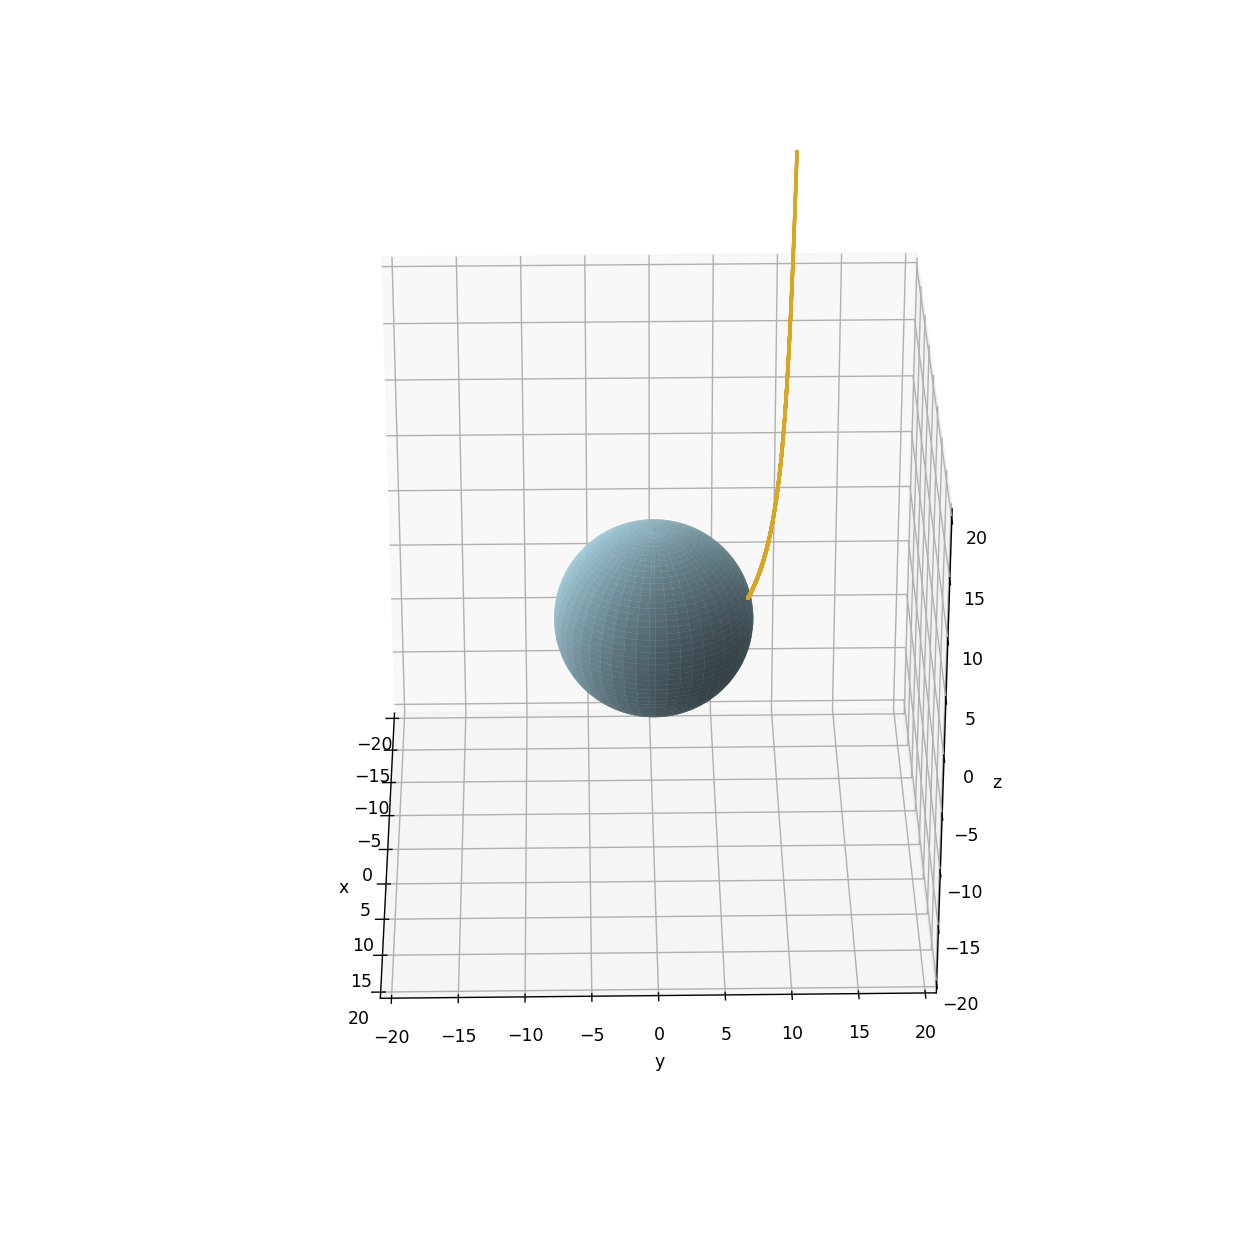

In [5]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

t = 0.
xcirc = r*np.cos(phi)*np.sin(theta)
ycirc = r*np.sin(phi)*np.sin(theta)
zcirc = r*np.cos(theta)
ax.scatter(xcirc,ycirc,zcirc,s=1,color="goldenrod")
    
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)
ax.plot_surface(x, y, z, color="lightblue")

plt.xlim(-20,20)
plt.ylim(-20,20)
ax.set_zlim(-20,20)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    plt.show()

plt.show()